In [18]:
%matplotlib inline

#### data set path

In [31]:
path = "../data/dogscats/sample/"

#### import some libraries

In [13]:
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [23]:
import utils; reload(utils)
from utils import plots

#### using the vgg model

In [19]:
batch_size = 64

In [20]:
from vgg16 import Vgg16

In [25]:
vgg = Vgg16()

In [38]:
batches = vgg.get_batches(path +'train', batch_size = batch_size)
val_batches = vgg.get_batches(path + 'valid', batch_size = batch_size * 2)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [39]:
imgs,labels = next(batches)

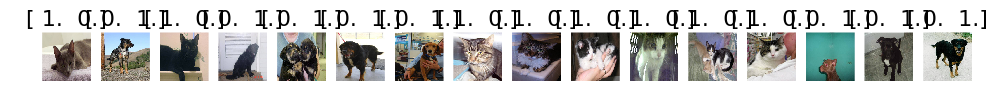

In [40]:
plots(imgs, titles=labels)

In [41]:
vgg.predict(imgs, True)

(array([ 0.5431,  0.7977,  0.9686,  0.8389,  0.5146,  0.9947,  0.6356,  0.8728,  0.9527,  0.9667,
         0.6928,  0.5072,  0.8913,  0.5053,  0.5924,  0.9896], dtype=float32),
 array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]),
 ['dogs',
  'dogs',
  'cats',
  'dogs',
  'dogs',
  'dogs',
  'cats',
  'cats',
  'cats',
  'cats',
  'cats',
  'dogs',
  'cats',
  'cats',
  'cats',
  'dogs'])

In [42]:
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch = 1)

Epoch 1/1
16/16 [==============================] - 1s - loss: 3.2071 - acc: 0.2500 - val_loss: 1.7157 - val_acc: 0.1250
